In [ ]:
#importing neccesary librarries
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


k = 1, Validation Accuracy = 0.6014
k = 2, Validation Accuracy = 0.5045
k = 3, Validation Accuracy = 0.4685
k = 4, Validation Accuracy = 0.4392
k = 5, Validation Accuracy = 0.4189
k = 6, Validation Accuracy = 0.4257
k = 7, Validation Accuracy = 0.4144
k = 8, Validation Accuracy = 0.4032
k = 9, Validation Accuracy = 0.4032
k = 10, Validation Accuracy = 0.3806


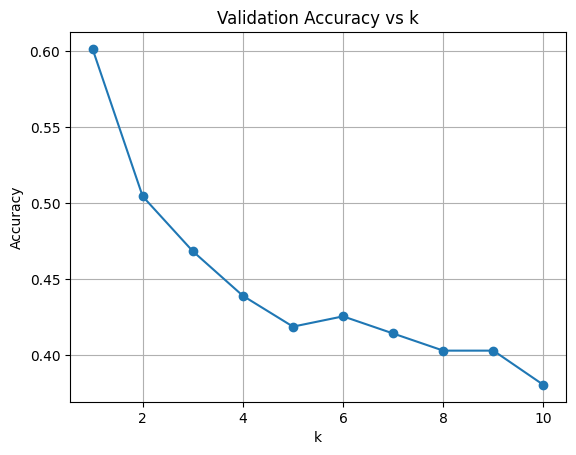

Best k: 1
Test Accuracy with k=1: 0.6532


In [ ]:
# Imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset (ImageFolder expects class folders A–I)
dataset = torchvision.datasets.ImageFolder(
    '/content/drive/MyDrive/Colab Notebooks/aps360/Lab3_Gestures_Summer',
    transform=transforms.ToTensor()
)

# Step 2: Use DataLoader to load and flatten all images
loader = DataLoader(dataset, batch_size=128, shuffle=False, num_workers=2)

all_features = []
all_labels = []

for images, labels in loader:
    images = images.view(images.size(0), -1)  # Flatten from [B, C, H, W] to [B, C*H*W]
    all_features.append(images)
    all_labels.append(labels)

X = torch.cat(all_features).numpy()
y = torch.cat(all_labels).numpy()

# Step 3: Train/Validation/Test split (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# Step 4: Standardize features (important for kNN!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 5: Try different values of k
accuracies = []
k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    accuracies.append(acc)
    print(f"k = {k}, Validation Accuracy = {acc:.4f}")

# Step 6: Plot validation accuracy vs k
plt.plot(k_values, accuracies, marker='o')
plt.title("Validation Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Step 7: Final test accuracy with best k
best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k}")

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_test_pred = knn_final.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with k={best_k}: {test_acc:.4f}")
